In [1]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
hdulist = fits.open('data/allStarLite-dr17-synspec_rev1.fits')


In [3]:

hdu1_data = hdulist[1].data


In [4]:
df4 = pd.DataFrame(hdu1_data.tolist(), columns=hdu1_data.names)

In [5]:
df = df4

In [11]:
# subset all chemical abundances (collumn name contain "_FE")
chemical_subset = df.filter(regex='_FE', axis=1) 

# merge with + df.filter(regex='_H', axis=1)
chemical_subset = pd.concat([chemical_subset, df.filter(regex='_H', axis=1)], axis=1)

In [17]:
low_variability_columns = []

for col in df.columns:
    try:
        # Si la colonne contient moins de 5 valeurs uniques, on l'ajoute à la liste
        if df[col].nunique() < 5:
            low_variability_columns.append(col)
    except TypeError:
        print(f"error with column {col}")

print("Colonnes avec faible variabilité :", low_variability_columns)



error with column PARAMFLAG
error with column X_M
error with column X_M_ERR
error with column ELEM_CHI2
error with column ELEMFRAC
error with column X_M_SPEC
Colonnes avec faible variabilité : ['TELESCOPE', 'APOGEE2_TARGET4', 'RV_ALPHA', 'RV_CARB', 'MAX_JK']


In [18]:
# create an error dataset containing all errors 
chemical_errors_subset = chemical_subset.filter(regex='_ERR', axis=1)

# create an error dataset containing all specs
chemical_specs_subset = chemical_subset.filter(regex='_SPEC', axis=1)

# create a dataset containing all the flags
flags_subset = chemical_subset.filter(regex='FLAG', axis=1)

# remove flags, err and spec from the chemical_subset
chemical_subset = chemical_subset.drop(chemical_errors_subset.columns, axis=1)
chemical_subset = chemical_subset.drop(chemical_specs_subset.columns, axis=1)
chemical_subset = chemical_subset.drop(flags_subset.columns, axis=1)






In [19]:
chemical_subset = chemical_subset.drop(columns=['GAIAEDR3_R_HI_GEO', 'GAIAEDR3_R_HI_PHOTOGEO'])
chemical_subset = chemical_subset.drop(columns=['MAX_H', 'MIN_H', 'M_H', 'FE_H', 'X_H'])

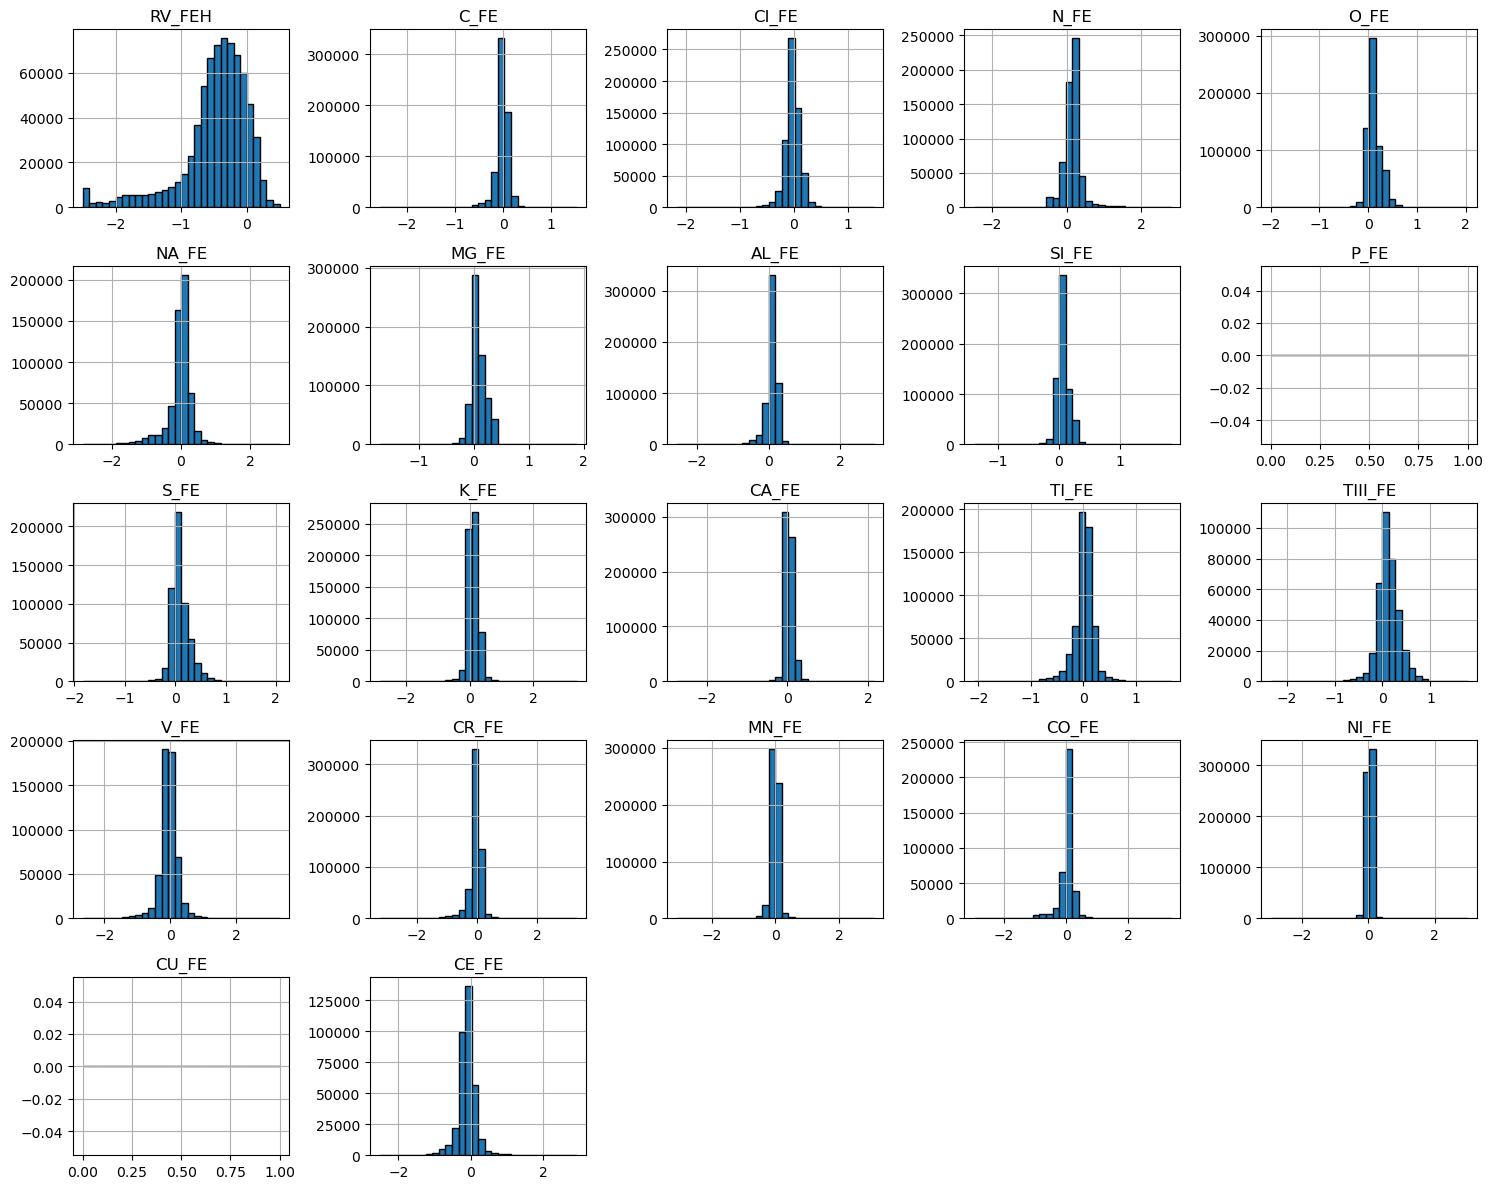

In [23]:
chemical_subset.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


In [25]:
chemical_subset.describe()

,RV_FEH,C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,...,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,CO_FE,NI_FE,CU_FE,CE_FE
count,722905.000000,643860.000000,640781.000000,591028.000000,643504.000000,567221.000000,646291.000000,572099.000000,646151.000000,0.0,...,628491.000000,582657.000000,363726.000000,549071.000000,569551.000000,578038.000000,388270.000000,633827.000000,0.0,353995.000000
mean,-0.481695,-0.019660,-0.026724,0.153415,0.113316,-0.037907,0.086484,0.084597,0.066517,NaN,...,0.034549,0.010108,0.122660,-0.048044,-0.060618,-0.026615,0.033257,0.024392,NaN,-0.120582
std,0.521245,0.136690,0.151087,0.235277,0.147854,0.362338,0.134797,0.163549,0.101628,NaN,...,0.109385,0.184133,0.219318,0.279651,0.245639,0.141188,0.265784,0.092472,NaN,0.270995
min,-2.500000,-2.569600,-2.167200,-2.484940,-1.998207,-2.827178,-1.709735,-2.566144,-1.392327,NaN,...,-2.744315,-2.088917,-2.328021,-2.651900,-3.240002,-3.103417,-2.981460,-2.930750,NaN,-2.510510
25%,-0.655817,-0.068629,-0.096530,0.048654,0.024019,-0.114108,0.006522,0.017449,0.007887,NaN,...,-0.020333,-0.058469,-0.006145,-0.163818,-0.109462,-0.075277,-0.019135,-0.004694,NaN,-0.228593
50%,-0.387937,-0.007691,-0.019620,0.164520,0.085721,0.017664,0.063213,0.087211,0.051817,NaN,...,0.020490,0.023871,0.105329,-0.052727,-0.018022,-0.020378,0.072580,0.029368,NaN,-0.117369
75%,-0.140608,0.049114,0.050469,0.245960,0.184313,0.128914,0.146786,0.171701,0.111780,NaN,...,0.076592,0.106538,0.247839,0.084922,0.038074,0.032915,0.141343,0.060413,NaN,0.001460
max,0.500000,1.529500,1.473540,2.791340,2.039563,2.847242,1.872143,2.931121,1.827411,NaN,...,2.137786,1.660383,1.774699,3.326362,3.309864,3.088052,3.374180,2.982033,NaN,2.913390


In [43]:
chemical_subset.corr(method='pearson', min_periods=1, numeric_only=True).style.background_gradient(cmap='coolwarm')

,RV_FEH,C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,CO_FE,NI_FE,CU_FE,CE_FE
RV_FEH,1.000000,0.161032,-0.067010,-0.079998,-0.424413,0.120298,-0.322389,0.098017,-0.407284,nan,-0.456183,-0.238152,-0.374215,0.010756,-0.240565,-0.128364,0.094520,0.373451,0.031540,0.085260,nan,-0.042270
C_FE,0.161032,1.000000,0.776669,-0.155308,0.251267,0.043986,0.361443,0.445123,0.253973,nan,0.062103,0.181440,0.064941,0.283240,0.130550,0.040807,0.036246,0.091266,0.183211,0.310320,nan,-0.062712
CI_FE,-0.067010,0.776669,1.000000,-0.240384,0.387944,-0.005214,0.433609,0.439977,0.386250,nan,0.188420,0.238042,0.182650,0.182924,0.214625,0.081544,-0.042789,-0.075701,0.127613,0.259503,nan,-0.067568
N_FE,-0.079998,-0.155308,-0.240384,1.000000,-0.081371,0.129418,-0.074207,-0.068600,-0.022089,nan,0.021632,0.008599,-0.048858,0.124550,-0.084941,0.000913,0.094127,0.112871,0.082925,0.004151,nan,0.134573
O_FE,-0.424413,0.251267,0.387944,-0.081371,1.000000,-0.005937,0.735833,0.263221,0.699299,nan,0.496943,0.351483,0.469054,0.234642,0.378816,0.103221,-0.024824,-0.386418,0.037657,0.202327,nan,-0.140431
NA_FE,0.120298,0.043986,-0.005214,0.129418,-0.005937,1.000000,0.072841,0.019470,0.007970,nan,0.004771,0.073596,0.022364,0.108983,-0.050770,0.052088,0.134320,0.113241,0.148925,0.137192,nan,-0.009874
MG_FE,-0.322389,0.361443,0.433609,-0.074207,0.735833,0.072841,1.000000,0.415851,0.756919,nan,0.545815,0.434394,0.524235,0.404755,0.424500,0.114404,0.073875,-0.313553,0.105421,0.294937,nan,-0.125596
AL_FE,0.098017,0.445123,0.439977,-0.068600,0.263221,0.019470,0.415851,1.000000,0.440596,nan,0.070689,0.258228,0.237220,0.162470,0.274245,0.094147,-0.039046,-0.070674,0.064621,0.288883,nan,-0.053357
SI_FE,-0.407284,0.253973,0.386250,-0.022089,0.699299,0.007970,0.756919,0.440596,1.000000,nan,0.478745,0.335987,0.458307,0.200050,0.405992,0.114862,-0.075259,-0.338194,0.070838,0.220578,nan,-0.090952
P_FE,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [44]:
chemical_subset.corr(method='kendall', min_periods=1, numeric_only=True).style.background_gradient(cmap='coolwarm')

,RV_FEH,C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,CO_FE,NI_FE,CU_FE,CE_FE
RV_FEH,1.000000,-0.030379,-0.158335,0.049139,-0.363754,0.164362,-0.270640,-0.143809,-0.331031,nan,-0.361881,-0.258587,-0.350394,-0.032514,-0.283557,-0.067469,0.121936,0.450650,0.050399,0.033828,nan,-0.040730
C_FE,-0.030379,1.000000,0.616433,-0.150247,0.254309,0.080063,0.320101,0.289474,0.252650,nan,0.177540,0.254480,0.101481,0.309994,0.142690,0.022192,0.057574,-0.058208,0.260641,0.324168,nan,-0.206534
CI_FE,-0.158335,0.616433,1.000000,-0.251406,0.320976,0.031306,0.312014,0.351783,0.332160,nan,0.216792,0.269327,0.159347,0.182734,0.199638,0.056751,-0.045982,-0.177852,0.208925,0.246137,nan,-0.163958
N_FE,0.049139,-0.150247,-0.251406,1.000000,-0.109420,0.128983,-0.095236,-0.145125,-0.101411,nan,-0.020757,-0.028299,-0.109682,0.037675,-0.132269,-0.054470,0.091446,0.183657,0.032045,0.019551,nan,0.108404
O_FE,-0.363754,0.254309,0.320976,-0.109420,1.000000,-0.037262,0.574478,0.298358,0.547704,nan,0.382875,0.330219,0.375787,0.226317,0.324445,0.073252,-0.060058,-0.359252,0.123015,0.231812,nan,-0.118277
NA_FE,0.164362,0.080063,0.031306,0.128983,-0.037262,1.000000,0.017835,0.018690,-0.014679,nan,-0.029961,0.046055,-0.036580,0.095673,-0.037091,0.016870,0.089561,0.139356,0.158521,0.149830,nan,-0.080620
MG_FE,-0.270640,0.320101,0.312014,-0.095236,0.574478,0.017835,1.000000,0.343388,0.534000,nan,0.426336,0.394833,0.442819,0.352411,0.318428,0.075653,0.046765,-0.341942,0.144835,0.311483,nan,-0.144473
AL_FE,-0.143809,0.289474,0.351783,-0.145125,0.298358,0.018690,0.343388,1.000000,0.462280,nan,0.143699,0.280634,0.293295,0.136905,0.258127,0.106356,-0.094665,-0.228722,0.099618,0.238592,nan,-0.087103
SI_FE,-0.331031,0.252650,0.332160,-0.101411,0.547704,-0.014679,0.534000,0.462280,1.000000,nan,0.309913,0.291734,0.362600,0.158385,0.334657,0.105482,-0.138002,-0.330857,0.110995,0.230254,nan,-0.115058
P_FE,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [41]:
chemical_subset.corr(method='spearman', min_periods=1, numeric_only=True).style.background_gradient(cmap='coolwarm')

d:\apps\anaconda3\2024.02-1\Lib\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
d:\apps\anaconda3\2024.02-1\Lib\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,RV_FEH,C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,CO_FE,NI_FE,CU_FE,CE_FE
RV_FEH,1.000000,-0.049218,-0.231553,0.065420,-0.500747,0.227026,-0.385382,-0.188602,-0.466918,nan,-0.503495,-0.370097,-0.488975,-0.048637,-0.404029,-0.100180,0.173174,0.600757,0.068276,0.047626,nan,-0.050472
C_FE,-0.049218,1.000000,0.784961,-0.213652,0.368118,0.115616,0.460081,0.410410,0.365420,nan,0.250767,0.362563,0.163898,0.439968,0.215076,0.032152,0.081745,-0.093918,0.360155,0.452961,nan,-0.288322
CI_FE,-0.231553,0.784961,1.000000,-0.357343,0.455686,0.044390,0.448542,0.490193,0.469124,nan,0.312446,0.387832,0.249251,0.270686,0.294283,0.082156,-0.069760,-0.260937,0.287014,0.348696,nan,-0.230373
N_FE,0.065420,-0.213652,-0.357343,1.000000,-0.150581,0.177706,-0.125381,-0.206580,-0.146366,nan,-0.023742,-0.035374,-0.152046,0.064829,-0.186026,-0.079051,0.132314,0.260218,0.049921,0.032146,nan,0.153002
O_FE,-0.500747,0.368118,0.455686,-0.150581,1.000000,-0.051380,0.737649,0.411718,0.717520,nan,0.528897,0.464845,0.518519,0.324313,0.460008,0.108251,-0.086556,-0.505256,0.169663,0.328455,nan,-0.169355
NA_FE,0.227026,0.115616,0.044390,0.177706,-0.051380,1.000000,0.028527,0.030171,-0.017549,nan,-0.042104,0.067073,-0.049257,0.134280,-0.052384,0.022392,0.125473,0.193608,0.218807,0.212275,nan,-0.113246
MG_FE,-0.385382,0.460081,0.448542,-0.125381,0.737649,0.028527,1.000000,0.475315,0.700365,nan,0.581371,0.546658,0.600124,0.490845,0.457470,0.112871,0.068249,-0.481137,0.207624,0.437009,nan,-0.207903
AL_FE,-0.188602,0.410410,0.490193,-0.206580,0.411718,0.030171,0.475315,1.000000,0.600988,nan,0.206323,0.397453,0.398855,0.205476,0.370522,0.152863,-0.137269,-0.308725,0.145711,0.338045,nan,-0.124545
SI_FE,-0.466918,0.365420,0.469124,-0.146366,0.717520,-0.017549,0.700365,0.600988,1.000000,nan,0.440902,0.421382,0.501563,0.238477,0.475754,0.152685,-0.199329,-0.467104,0.159452,0.326696,nan,-0.165096
P_FE,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
